### Spectral Pooling for Grayscale Images
#### Things to do 

1. One Gray Image 

1. One Color Image 

2. Plot Image Matrix for each



In [1]:
import sys 
sys.path.append("../")

from modules.spectral_pooling import SpectralPooling
from modules.utils import approximation_loss,max_pool

import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 



Shape of Grayscale Image : (256, 256)


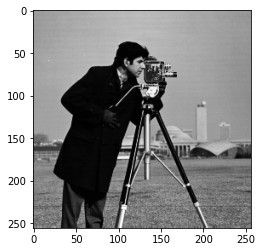

In [2]:
# Read Grayscale Image 
grayscale_image = cv2.imread('../../images/Cameraman_Image.png',0)

# Print the shape of image 
print(f"Shape of Grayscale Image : {grayscale_image.shape}")

# Plot the 
plt.imshow(grayscale_image,cmap="gray")

In [3]:
spectral_pooling = SpectralPooling()

In [4]:
print(f"Spectral Pooling with Pooling Size : {2}")

# Make the image 4 Dimensions 
grayscale_image_expanded = np.expand_dims(np.expand_dims(grayscale_image,0),-1)

print(f"Expanded Grayscale image to : {grayscale_image_expanded.shape}")

filtered_fourier_image,filtered_spatial_image = spectral_pooling.utils_spectral_pool(grayscale_image_expanded,pool_size=2)

print(f"Filtered Spatial Image generated of shape : {filtered_spatial_image.shape}")


Spectral Pooling with Pooling Size : 2
Expanded Grayscale image to : (1, 256, 256, 1)
Filtered Spatial Image generated of shape : (1, 256, 256, 1)


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fda904611d0>)

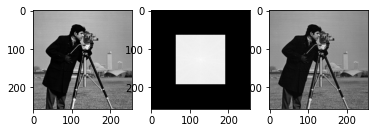

In [5]:
plt.subplot(131),plt.imshow(np.squeeze(grayscale_image_expanded),cmap="gray")
plt.subplot(132),plt.imshow(np.squeeze(filtered_fourier_image),cmap="gray")
plt.subplot(133),plt.imshow(np.squeeze(filtered_spatial_image),cmap="gray")

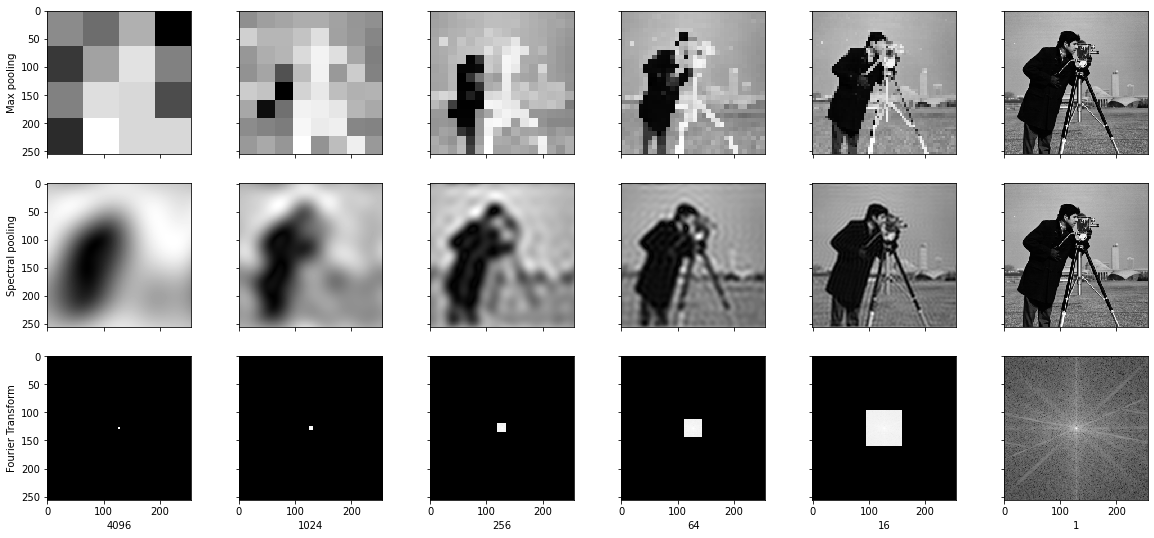

In [12]:
fig, axes = plt.subplots(3, 6, figsize=(20, 9), sharex=True, sharey=True)
pool_size = [64, 32, 16, 8, 4, 1]

for i in range(len(pool_size)):
    
    ax1 = axes[0,i]
    max_pooledimage = max_pool(grayscale_image_expanded,pool_size[i])
    
    # Plot the max_pooledimage
    ax1.imshow(np.squeeze(max_pooledimage), interpolation='none',cmap="gray")
    
    filter_shape = [int(x//pool_size[i]) for x in grayscale_image.shape]
    filtered_fourier_image,filtered_spatial_image = spectral_pooling.utils_spectral_pool(grayscale_image_expanded,pool_size=pool_size[i])
    
    ax2 = axes[1,i]
    ax2.imshow(np.squeeze(filtered_spatial_image), interpolation='none',cmap="gray")
    
    ax3 = axes[2,i]
    ax3.imshow(np.squeeze(filtered_fourier_image), interpolation='none',cmap="gray")
    ax3.set_xlabel(pool_size[i]**2)
    
    if i == 0 : 
        ax1.set_ylabel("Max pooling")
        ax2.set_ylabel("Spectral pooling")
        ax3.set_ylabel("Fourier Transform")
    

### Spectral Pooling for RGB Images 

Shape of Grayscale Image : (200, 200, 3)


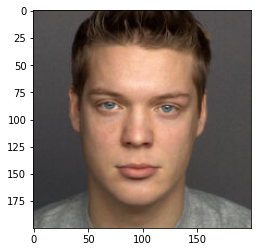

In [8]:
# Read Grayscale Image 
rgb_image = cv2.imread('../../images/Male_Image.jpeg')
rgb_image = rgb_image[:,:,::-1]

# Print the shape of image 
print(f"Shape of Grayscale Image : {rgb_image.shape}")

# Plot the 
_ = plt.imshow(rgb_image,cmap="gray")

In [9]:
spectral_pooling = SpectralPooling()

In [10]:
filter_shape = [int(0.2*x) for x in rgb_image.shape]
print(f"Spectral Pooling with Filter Shape : {filter_shape}")

# Make the image 4 Dimensions 
rgb_image_expanded = np.expand_dims(rgb_image,0)

print(f"Expanded Grayscale image to : {rgb_image_expanded.shape}")

filtered_fourier_image,filtered_spatial_image = spectral_pooling.utils_spectral_pool(rgb_image_expanded,pool_size=2)

print(f"Filtered Spatial Image generated of shape : {filtered_spatial_image.shape}")


Spectral Pooling with Filter Shape : [40, 40, 0]
Expanded Grayscale image to : (1, 200, 200, 3)
Filtered Spatial Image generated of shape : (1, 200, 200, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fda2c0fb278>)

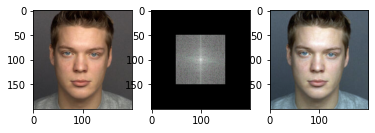

In [11]:
plt.subplot(131),plt.imshow(np.squeeze(rgb_image))
plt.subplot(132),plt.imshow(np.squeeze(filtered_fourier_image))
plt.subplot(133),plt.imshow(np.squeeze(filtered_spatial_image))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


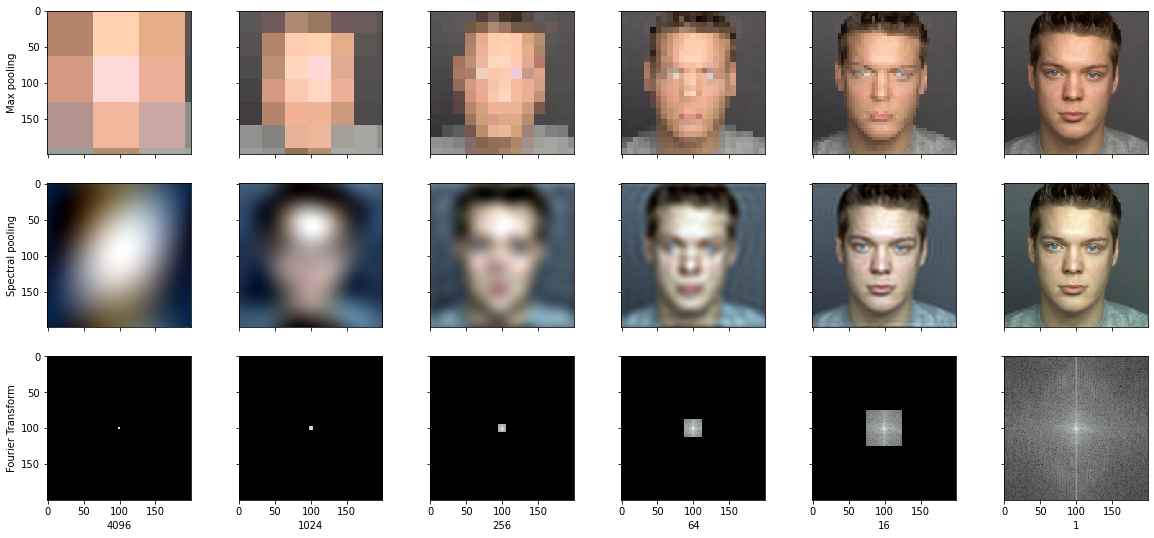

In [13]:
fig, axes = plt.subplots(3, 6, figsize=(20, 9), sharex=True, sharey=True)
pool_size = [64, 32, 16, 8, 4, 1]

for i in range(len(pool_size)):
    
    ax1 = axes[0,i]
    max_pooledimage = max_pool(rgb_image_expanded,pool_size[i])
    
    # Plot the max_pooledimage
    ax1.imshow(np.squeeze(max_pooledimage), interpolation='none',cmap="gray")
    
    filtered_fourier_image,filtered_spatial_image = spectral_pooling.utils_spectral_pool(rgb_image_expanded,pool_size=pool_size[i])

#     filter_shape = [int(x//pool_size[i]) for x in rgb_image.shape]
#     filtered_fourier_image,filtered_spatial_image = spectral_pooling.spectral_pool(rgb_image_expanded,filter_shape=filter_shape)  

    ax2 = axes[1,i]
    ax2.imshow(np.squeeze(filtered_spatial_image), interpolation='none',cmap="gray")
    
    ax3 = axes[2,i]
    ax3.imshow(np.squeeze(filtered_fourier_image), interpolation='none',cmap="gray")
    ax3.set_xlabel(pool_size[i]**2)
    if i == 0 : 
        ax1.set_ylabel("Max pooling")
        ax2.set_ylabel("Spectral pooling")
        ax3.set_ylabel("Fourier Transform")